In [1]:
import uproot
import awkward as ak
import numpy as np
import hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
from collections import defaultdict

In [26]:
feature_name = "nJet"
year=2018
btag_systs_nojec = ["cferr1", "cferr2", "hf", "hfstats1", "hfstats2", "lf", "lfstats1", "lfstats2"]
btag_systs_jec = ["jesFlavorQCD", "jesRelativeBal", "jesHF", "jesBBEC1", "jesEC2", "jesAbsolute",
    f"jesBBEC1_{year}", f"jesEC2_{year}", f"jesAbsolute_{year}", f"jesHF_{year}", f"jesRelativeSample_{year}"]

jec_nba_to_branch_map = {
"jec_1": "_smeared_FlavorQCD",
"jec_2": "_smeared_RelativeBal",
"jec_3": "_smeared_HF",
"jec_4": "_smeared_BBEC1",
"jec_5": "_smeared_EC2",
"jec_6": "_smeared_Absolute",
"jec_7": f"_smeared_BBEC1_{year}",
"jec_8": f"_smeared_EC2_{year}",
"jec_9": f"_smeared_Absolute_{year}",
"jec_10": f"_smeared_HF_{year}",
"jec_11": f"_smeared_RelativeSample_{year}",
}
jec_nba_to_label_map = {
"jec_1": "FlavorQCD",
"jec_2": "RelativeBal",
"jec_3": "HF",
"jec_4": "BBEC1",
"jec_5": "EC2",
"jec_6": "Absolute",
"jec_7": f"BBEC1_{year}",
"jec_8": f"EC2_{year}",
"jec_9": f"Absolute_{year}",
"jec_10": f"HF_{year}",
"jec_11": f"RelativeSample_{year}",
}
all_systs = ["CMS_btag_" + s for s in btag_systs_nojec] + list(jec_nba_to_branch_map.keys())
processes = ["wjets", "dy", "tt", "vv_v", "ttx", "higgs", "others"]

systs_plotting_order = ["nominal"]
systs_label_plotting_order = ["Nominal"]
for s in btag_systs_nojec: 
    systs_plotting_order.extend(["CMS_btag_" + s+"_up", "CMS_btag_" + s+"_down"])
    systs_label_plotting_order.extend([s + " Up", s+ " Down"])
for s in jec_nba_to_branch_map:
    systs_plotting_order.extend([s+"_up", s+"_down"])
    systs_label_plotting_order.extend([jec_nba_to_label_map[s] + " Up", jec_nba_to_label_map[s] + " Down"])
    

In [34]:
def open_featureHistogram(process, region, with_btag:bool):
    with uproot.open(f"/grid_mnt/data__data.polcms/cms/cuisset/cmt/FeatureHistogram/bul_{year}_ZZ_v12/cat_baseline_resolved_nobtag/prod_250315_btag_extrap_factor_systs_{'withbTagWeight' if with_btag else 'nobTagWeight'}/root/{feature_name}__{region}__pg_zz__nodata.root:histograms") as folder:
        res = {
            "nominal" : folder[process].to_hist(),
        }
        for syst in all_systs:
            for dir in ["up", "down"]:
                res[syst + "_" + dir] = folder[f"{process}_{syst}_{dir}"].to_hist()
        return res

def makeTotalHists(region, with_btag:bool):
    hists = [open_featureHistogram(process, region, with_btag=with_btag) for process in processes]
    res = {}
    for syst_dir in hists[0].keys():
        res[syst_dir] = sum(process_hists[syst_dir] for process_hists in hists)
    return res

def makeRatio(region):
    totalHists_withbtag = makeTotalHists(region, with_btag=True)
    totalHists_nobtag = makeTotalHists(region, with_btag=False)
    ratios = {}
    for syst_dir in totalHists_withbtag.keys():
        with_btag = totalHists_withbtag[syst_dir]
        no_btag = totalHists_nobtag[syst_dir]
        ratios[syst_dir] = no_btag.sum(flow=True).value/with_btag.sum(flow=True).value
    return ratios

def plotRatios(ratios):

    regions = list(ratios.keys())#["inclusive", "etau", "mutau", "tautau"]
    fig, axs = plt.subplots(1, len(regions), figsize=(10*len(regions), 8), sharey=True, squeeze=False)
    axs = axs[0]
    plt.subplots_adjust(wspace=0.)
    axs[-1].tick_params(labelright=True)
    for region, ax in zip(regions, axs):
        plt.sca(ax)
        ys = list()
        for s in systs_plotting_order:
            ys.append(ratios[region][s])
        ys = np.array(ys)
        xs = np.arange(0, len(ys), 1)
        plt.axhline(ys[0])
        for i in np.arange(0.5, len(ys), 2):
            plt.axvline(i, ls=(0,(1, 3)), color="black", lw=1)
        plt.plot(xs[:1], ys[:1], 'bx')
        plt.plot(xs[1:], ys[1:], 'bo')
        plt.xticks(xs, systs_label_plotting_order, rotation="vertical", size=15)
        ax.set_title(region)

In [ ]:
makeTotalHists("baseline_region", True)

{'nominal': Hist(Regular(20, 0, 20, name='xaxis', label=' nJet'), storage=Weight()) # Sum: WeightedSum(value=3.17542e+06, variance=1.39986e+07) (WeightedSum(value=3.17587e+06, variance=1.39988e+07) with flow),
 'CMS_btag_cferr1_up': Hist(Regular(20, 0, 20, name='xaxis', label=' nJet'), storage=Weight()) # Sum: WeightedSum(value=3.36384e+06, variance=1.56654e+07) (WeightedSum(value=3.36435e+06, variance=1.56655e+07) with flow),
 'CMS_btag_cferr1_down': Hist(Regular(20, 0, 20, name='xaxis', label=' nJet'), storage=Weight()) # Sum: WeightedSum(value=2.98139e+06, variance=1.29762e+07) (WeightedSum(value=2.98179e+06, variance=1.29764e+07) with flow),
 'CMS_btag_cferr2_up': Hist(Regular(20, 0, 20, name='xaxis', label=' nJet'), storage=Weight()) # Sum: WeightedSum(value=3.27583e+06, variance=1.48454e+07) (WeightedSum(value=3.27631e+06, variance=1.48456e+07) with flow),
 'CMS_btag_cferr2_down': Hist(Regular(20, 0, 20, name='xaxis', label=' nJet'), storage=Weight()) # Sum: WeightedSum(value=3.0

In [35]:
all_ratios = {region : makeRatio(region) for region in ["baseline_region", "etau", "mutau", "tautau"]}

In [37]:
all_ratios["baseline_region"]

{'nominal': 0.9847349596436107,
 'CMS_btag_cferr1_up': 0.9295676061634119,
 'CMS_btag_cferr1_down': 1.0488307779099046,
 'CMS_btag_cferr2_up': 0.9545460805326519,
 'CMS_btag_cferr2_down': 1.018482387768795,
 'CMS_btag_hf_up': 0.9950148570240235,
 'CMS_btag_hf_down': 0.9803452246073541,
 'CMS_btag_hfstats1_up': 0.9843006684288421,
 'CMS_btag_hfstats1_down': 0.9853420431879876,
 'CMS_btag_hfstats2_up': 0.985945722474838,
 'CMS_btag_hfstats2_down': 0.9836162426012275,
 'CMS_btag_lf_up': 0.9917811920451158,
 'CMS_btag_lf_down': 0.9849654793386279,
 'CMS_btag_lfstats1_up': 1.003180212971681,
 'CMS_btag_lfstats1_down': 0.9667669421348495,
 'CMS_btag_lfstats2_up': 0.999334372226957,
 'CMS_btag_lfstats2_down': 0.9704985705172223,
 'jec_1_up': 0.9851163629786623,
 'jec_1_down': 0.9840481735345471,
 'jec_2_up': 0.9844763502516121,
 'jec_2_down': 0.9848041459981707,
 'jec_3_up': 0.9846843677643773,
 'jec_3_down': 0.9847231842201376,
 'jec_4_up': 0.9849013904076814,
 'jec_4_down': 0.98457907913809

In [38]:
for region in all_ratios.keys(): print(region + " nominal = " + str(all_ratios[region]["nominal"]))

baseline_region nominal = 0.9847349596436107
etau nominal = 0.9831101575559661
mutau nominal = 0.985604379134315
tautau nominal = 0.9763400549053456


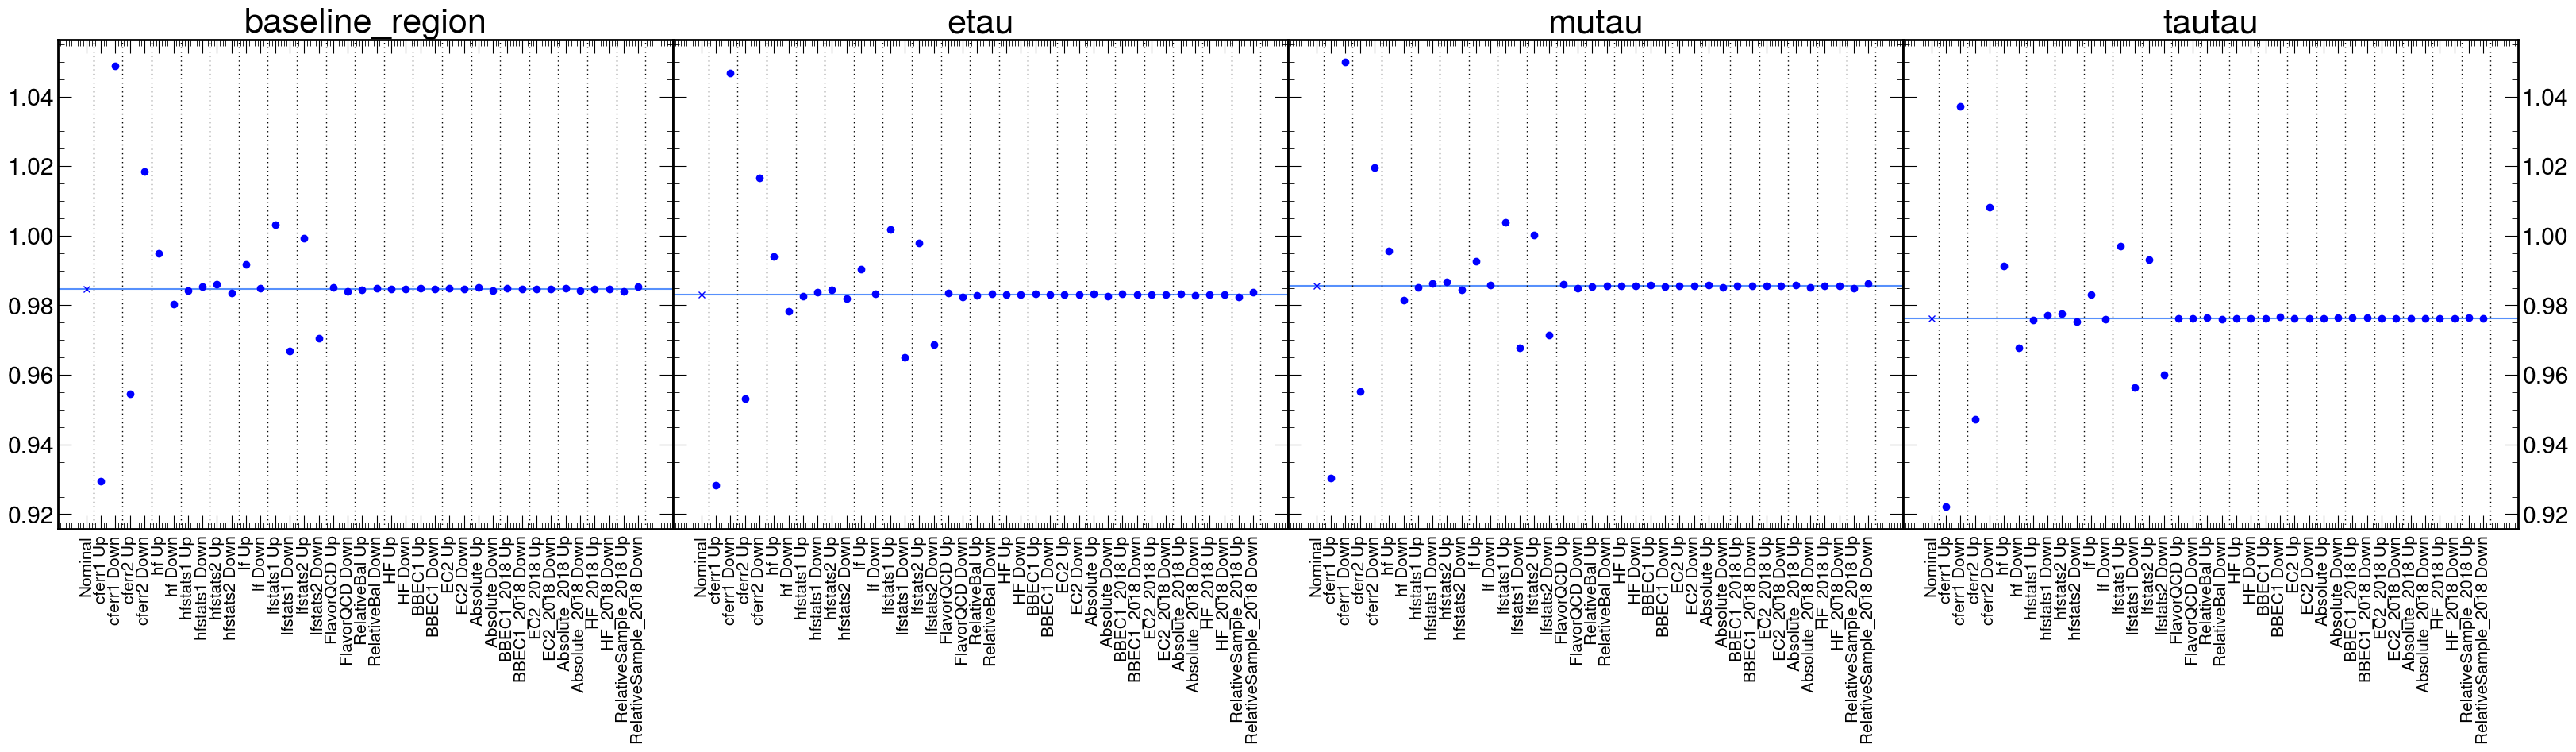

In [36]:
plotRatios(all_ratios)